In [2]:
import ROOT
import os
#os.system('pushd /cvmfs/cms.cern.ch/slc7_amd64_gcc10/cms/cmssw/CMSSW_12_6_0/src/;cmsenv; pushd')

In [4]:
class histogramHandler():
    
    def __init__(self):
        
        self.h1s = []
        self.h1names = []
        self.h1axis = []
        self.nh1 = 0
        
    def initStyle(self):
        
        ROOT.gStyle
        
    def addHistogram(self, h, name, axis):

        self.h1s.append(h)
        self.h1names.append(name)
        self.h1axis.append(axis)
        #self.h1s[-1].SetMarkerStyle(20)
        self.h1s[-1].SetLineWidth(2)
        self.nh1+=1
        
    def plotHistograms(self, ylog):
        
        for h in range(0, self.nh1):
            c1 = ROOT.TCanvas('c1', '', 1000, 900)
            c1.SetLogy(ylog)
            self.h1s[h].GetXaxis().SetTitle(self.h1axis[h])
            self.h1s[h].Draw('PE')
            c1.SaveAs(self.h1names[h] + '.png')

In [6]:
# Read the file
file = ROOT.TFile.Open("/eos/user/f/fernance/standard-TutoriasFiles/43718dea-5cd4-48a7-b73b-df168edf1fac.root")
tree = file.Get('Events')

In [7]:
tree.SetAlias('Dimuon_mass', 'sqrt(2*Muon_pt[0]*Muon_pt[1]*(cosh(Muon_eta[0] - Muon_eta[1]) - cos(Muon_phi[0] - Muon_phi[1])))')

True

In [8]:
h_muonpt = ROOT.TH1F('h_muonpt', '', 100, 0, 100)
h_dimuonmass = ROOT.TH1F('h_dimuonmass', '', 100, 0, 140)

In [9]:
tree.Project('h_muonpt', 'Muon_pt', 'nMuon > 1')
tree.Project('h_dimuonmass', 'Dimuon_mass', 'nMuon > 1')

334196

In [10]:
histograms = histogramHandler()
histograms.addHistogram(h_muonpt, 'h_muonpt', 'Muon p_{T} (GeV)')
histograms.addHistogram(h_dimuonmass, 'h_dimuonmass', 'Dimuon mass (GeV)')

In [ ]:
histograms.plotHistograms(True)

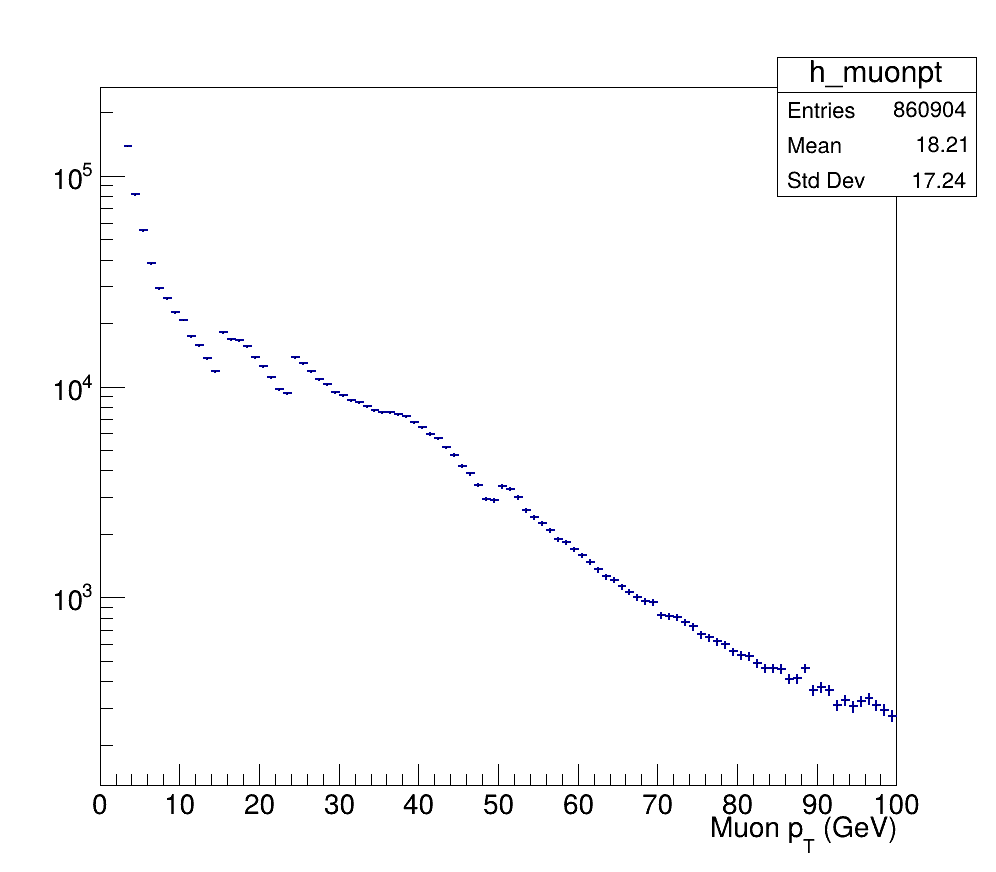

In [1]:
from IPython.display import Image
display(Image(filename="h_muonpt.png"))